In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# NSE-TATAGLOBAL

In [9]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
dataset_test = pd.read_csv('tatatest.csv')

training_set = dataset_train.iloc[:, 1:2].values
test_set = dataset_test.iloc[:, 1:2].values

dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1975/1975 [==============================] - 19s 10ms/step - loss: 0.0100
Epoch 2/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0034
Epoch 3/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0027
Epoch 5/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0022
Epoch 7/100
1975/1975 [==============================] - 16s 8ms/step - loss: 0.0021
Epoch 8/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0020
Epoch 9/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0021
Epoch 10/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0020
Epoch 11/100
1975/1975 [==============================] - 15s 8ms/step - loss: 0.0017
Epoch 12/100
1975/1975 [==============================] - 15s

1975/1975 [==============================] - 17s 9ms/step - loss: 6.4965e-04
Epoch 92/100
1975/1975 [==============================] - 18s 9ms/step - loss: 5.9859e-04
Epoch 93/100
1975/1975 [==============================] - 18s 9ms/step - loss: 6.8751e-04
Epoch 94/100
1975/1975 [==============================] - 20s 10ms/step - loss: 6.3320e-04
Epoch 95/100
1975/1975 [==============================] - 16s 8ms/step - loss: 6.8891e-04
Epoch 96/100
1975/1975 [==============================] - 17s 8ms/step - loss: 7.9543e-04
Epoch 97/100
1975/1975 [==============================] - 17s 8ms/step - loss: 6.1338e-04
Epoch 98/100
1975/1975 [==============================] - 16s 8ms/step - loss: 6.1215e-04
Epoch 99/100
1975/1975 [==============================] - 17s 9ms/step - loss: 5.7969e-04
Epoch 100/100
1975/1975 [==============================] - 17s 9ms/step - loss: 6.2868e-04


In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,76):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1,1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = sc.inverse_transform(y_test)

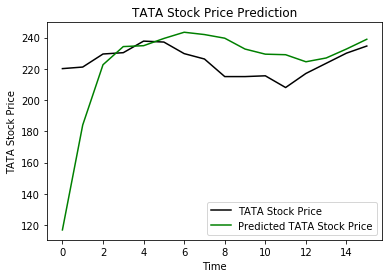

In [27]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

# HANG SENG INDEX (^HSI)

In [32]:
dataset_train = pd.read_csv('HANG SENG INDEX_train.csv')
dataset_test = pd.read_csv('HANG SENG INDEX_test.csv')

training_set = dataset_train.iloc[:, 1:2].values
test_set = dataset_test.iloc[:, 1:2].values

dataset_train.head()

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 230):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,75):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1,1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = sc.inverse_transform(y_test)

Epoch 1/100
170/170 [==============================] - 5s 32ms/step - loss: 0.1882
Epoch 2/100
170/170 [==============================] - 2s 9ms/step - loss: 0.0668
Epoch 3/100
170/170 [==============================] - 1s 9ms/step - loss: 0.0599
Epoch 4/100
170/170 [==============================] - 2s 9ms/step - loss: 0.0435
Epoch 5/100
170/170 [==============================] - 1s 9ms/step - loss: 0.0457
Epoch 6/100
170/170 [==============================] - 2s 10ms/step - loss: 0.0402
Epoch 7/100
170/170 [==============================] - 2s 9ms/step - loss: 0.0435
Epoch 8/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0354
Epoch 9/100
170/170 [==============================] - 1s 8ms/step - loss: 0.0315
Epoch 10/100
170/170 [==============================] - 1s 9ms/step - loss: 0.0341
Epoch 11/100
170/170 [==============================] - 2s 11ms/step - loss: 0.0314
Epoch 12/100
170/170 [==============================] - 2s 11ms/step - loss: 0.0306
Epoch 13

170/170 [==============================] - 1s 8ms/step - loss: 0.0129
Epoch 100/100
170/170 [==============================] - 1s 8ms/step - loss: 0.0118


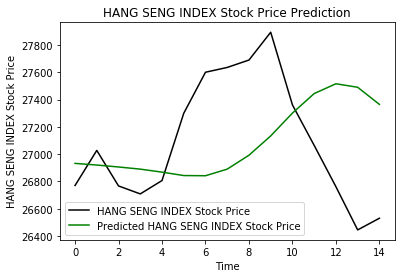

In [33]:
plt.plot(real_stock_price, color = 'black', label = 'HANG SENG INDEX Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted HANG SENG INDEX Stock Price')
plt.title('HANG SENG INDEX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HANG SENG INDEX Stock Price')
plt.legend()
plt.show()

# Nikkei 225 (^N225)

In [37]:
dataset_train = pd.read_csv('Nikkei 225_train.csv')
dataset_test = pd.read_csv('Nikkei 225_test.csv')

training_set = dataset_train.iloc[:, 1:2].values
test_set = dataset_test.iloc[:, 1:2].values

dataset_train.head()

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 224):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,75):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1,1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = sc.inverse_transform(y_test)

Epoch 1/100
164/164 [==============================] - 6s 35ms/step - loss: 0.2294
Epoch 2/100
164/164 [==============================] - 2s 10ms/step - loss: 0.1109
Epoch 3/100
164/164 [==============================] - 2s 10ms/step - loss: 0.0608
Epoch 4/100
164/164 [==============================] - 1s 9ms/step - loss: 0.0390
Epoch 5/100
164/164 [==============================] - 2s 9ms/step - loss: 0.0407
Epoch 6/100
164/164 [==============================] - 2s 11ms/step - loss: 0.0323
Epoch 7/100
164/164 [==============================] - 2s 11ms/step - loss: 0.0337
Epoch 8/100
164/164 [==============================] - 2s 10ms/step - loss: 0.0335
Epoch 9/100
164/164 [==============================] - 2s 10ms/step - loss: 0.0280
Epoch 10/100
164/164 [==============================] - 2s 9ms/step - loss: 0.0267
Epoch 11/100
164/164 [==============================] - 2s 12ms/step - loss: 0.0284
Epoch 12/100
164/164 [==============================] - 2s 11ms/step - loss: 0.0262
Epoc

164/164 [==============================] - 1s 9ms/step - loss: 0.0159
Epoch 100/100
164/164 [==============================] - 1s 9ms/step - loss: 0.0163


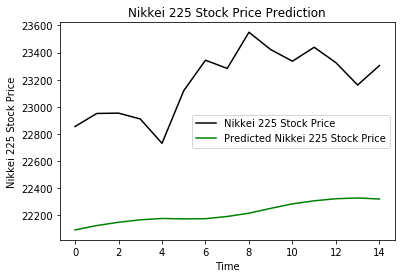

In [38]:
plt.plot(real_stock_price, color = 'black', label = 'Nikkei 225 Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Nikkei 225 Stock Price')
plt.title('Nikkei 225 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nikkei 225 Stock Price')
plt.legend()
plt.show()